# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
btc = 1.2
eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"



In [5]:
# Fetch current BTC price

btc_data = requests.get(btc_url).json()
btc_price = btc_data['data']['1']['quotes']['USD']['price']
btc_price
# Fetch current ETH price
eth_data = requests.get(eth_url).json()
eth_price = eth_data['data']['1027']['quotes']['USD']['price']
eth_price

# Compute current value of my crpto
my_btc_value = btc_price*btc
my_eth_value = eth_price*eth
total_crypto = (my_btc_value+my_eth_value)

# Print current crypto wallet balance
print(f"The current value of your {btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {eth} ETH is ${my_eth_value:0.2f}")
print(f"The current value of your Crypto Portfolio is ${total_crypto:0.2f}")

The current value of your 1.2 BTC is $33644.40
The current value of your 5.3 ETH is $9469.67
The current value of your Crypto Portfolio is $43114.07


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [36]:
# Set Alpaca API key and secret
# Set Alpaca API key and secret
Alpaca_key = os.getenv("Alpaca_key")
Alpaca_secret = os.getenv("Alpaca_secret")


# Create the Alpaca API object
api = tradeapi.REST(
    Alpaca_key,
    Alpaca_secret,
    api_version = "v2")
api

In [8]:
# Format current date as ISO format
start_date = pd.Timestamp("2016-05-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2023-03-24", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG","SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current ticker data for SPY and AGG
ticker_data = api.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date).df
ticker_data.head()

# Separate ticker data
AGG = ticker_data[ticker_data["symbol"]=="AGG"].drop("symbol", axis=1)
SPY = ticker_data[ticker_data["symbol"]=="SPY"].drop("symbol", axis=1)

# Concatenate the ticker DataFrames
ticker_data = pd.concat([AGG,SPY], axis=1, keys=["AGG","SPY"])
ticker_data


AGG                                        \
                             open      high       low    close   volume   
timestamp                                                                 
2016-05-02 04:00:00+00:00  110.74  110.7400  110.5200  110.605  3553939   
2016-05-03 04:00:00+00:00  110.89  110.9450  110.7500  110.810  3044940   
2016-05-04 04:00:00+00:00  110.91  110.9315  110.7595  110.860  2920608   
2016-05-05 04:00:00+00:00  110.92  111.1600  110.8010  111.140  3008142   
2016-05-06 04:00:00+00:00  111.12  111.1200  110.9700  110.970  2718710   
...                           ...       ...       ...      ...      ...   
2023-03-20 04:00:00+00:00   99.73   99.7300   99.0150   99.100  6346444   
2023-03-21 04:00:00+00:00   98.88   99.0300   98.7000   98.800  5499073   
2023-03-22 04:00:00+00:00   98.80   99.8200   98.6400   99.750  7585382   
2023-03-23 04:00:00+00:00   99.68  100.0500   99.5100   99.990  9949714   
2023-03-24 04:00:00+00:00  100.28  100.4900   99.9500  100.160  6203977   

                                                       SPY                  \
                          trade_count        vwap     open    high     low   
timestamp                                                                    
2016-05-02 04:00:00+00:00       15119  110.627199  206.920  208.18  206.41   
2016-05-03 04:00:00+00:00       15662  110.865995  206.520  206.80  205.28   
2016-05-04 04:00:00+00:00       13982  110.879063  204.990  205.85  204.42   
2016-05-05 04:00:00+00:00       15707  111.028363  205.560  205.98  204.47   
2016-05-06 04:00:00+00:00       12697  111.031967  204.080  205.77  203.88   
...                               ...         ...      ...     ...     ...   
2023-03-20 04:00:00+00:00       27948   99.214330  390.800  394.17  390.07   
2023-03-21 04:00:00+00:00       24431   98.828552  397.240  399.41  395.58   
2023-03-22 04:00:00+00:00       37878   99.276449  398.730  402.49  392.07   
2023-03-23 04:00:00+00:00       36031   99.705660  395.090  399.29  390.35   
2023-03-24 04:00:00+00:00       23905  100.145648  391.841  395.84  389.40   

                                                                        
                              close     volume trade_count        vwap  
timestamp                                                               
2016-05-02 04:00:00+00:00  207.9700   61908515      263580  207.294812  
2016-05-03 04:00:00+00:00  206.1592  106422142      377518  206.312060  
2016-05-04 04:00:00+00:00  205.0100   92199810      345261  205.090172  
2016-05-05 04:00:00+00:00  204.9700   67597222      280622  205.141555  
2016-05-06 04:00:00+00:00  205.7200   89131004      340335  204.937074  
...                             ...        ...         ...         ...  
2023-03-20 04:00:00+00:00  393.7400   93077851      725845  392.355664  
2023-03-21 04:00:00+00:00  398.9100   91537353      630029  397.098666  
2023-03-22 04:00:00+00:00  392.1100  111781863      874864  397.601591  
2023-03-23 04:00:00+00:00  393.1700  119351319      871935  394.576872  
2023-03-24 04:00:00+00:00  395.7500  107053295      801995  393.110712  

[1737 rows x 14 columns]

In [9]:
# Pick AGG and SPY close prices
df_closing_prices = pd.DataFrame()

# Fetch the closing prices of AGG and SPY
df_closing_prices["AGG"] = ticker_data["AGG"]["close"]
df_closing_prices["SPY"] = ticker_data["SPY"]["close"]

# Drop the time component of the date
df_closing_prices.index = df_closing_prices.index.date

# Display sample data
df_closing_prices
AGG_close_price = df_closing_prices["AGG"][-1]
SPY_close_price = df_closing_prices["SPY"][-1]

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${AGG_close_price}")
print(f"Current SPY closing price: ${SPY_close_price}")


Current AGG closing price: $100.16
Current SPY closing price: $395.75


In [10]:
# Compute the current value of shares
last_day = print(df_closing_prices.tail(1))
last_day

AGG_03_24 = AGG_close_price*my_agg
SPY_03_24 = SPY_close_price*my_spy
total_shares = (AGG_03_24+SPY_03_24)
print(total_shares)

# Print current value of shares
print(SPY_03_24,AGG_03_24)

print(f"The current value of your {my_spy} SPY shares is ${SPY_03_24:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${AGG_03_24:0.2f}")
print(f"The current value of your total shares is ${total_shares:0.2f}")

               AGG     SPY
2023-03-24  100.16  395.75
39819.5
19787.5 20032.0
The current value of your 50 SPY shares is $19787.50
The current value of your 200 AGG shares is $20032.00
The current value of your total shares is $39819.50


### Savings Health Analysis

In [11]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
assets = [total_crypto,total_shares]

# Create savings DataFrame
df_savings = pd.DataFrame(assets, columns = ['amount'],index = ['crypto','shares'])
df_savings

# Display savings DataFrame
#display(df_savings)

,amount
crypto,43114.069
shares,39819.500


<AxesSubplot:ylabel='amount'>

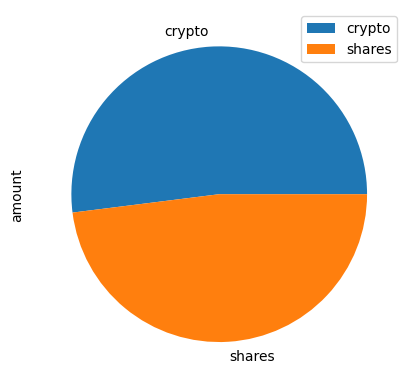

In [12]:
# Plot savings pie chart
df_savings.plot.pie(y="amount")

In [13]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = (total_crypto + total_shares)
total_savings
# Validate saving health
if total_savings > emergency_fund:
    print('Congratulations for having enough money in the emergency fund')
elif total_savings == emergency_fund:
    print('')
elif total_savings < emergency_fund:
    print('')
    

Congratulations for having enough money in the emergency fund


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [14]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2023-03-24', tz='America/New_York').isoformat()

In [15]:
# Get 5 years' worth of historical data for SPY and AGG
# Set the tickers
tickers = ["AGG","SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current ticker data for SPY and AGG
ticker_data = api.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date).df
ticker_data.head()

# Separate ticker data
AGG = ticker_data[ticker_data["symbol"]=="AGG"].drop("symbol", axis=1)
SPY = ticker_data[ticker_data["symbol"]=="SPY"].drop("symbol", axis=1)

# Concatenate the ticker DataFrames
ticker_data = pd.concat([AGG,SPY], axis=1, keys=["AGG","SPY"])
ticker_data

# Display sample data
#df_stock_data.head()

AGG                                        \
                             open      high       low    close   volume   
timestamp                                                                 
2016-05-02 04:00:00+00:00  110.74  110.7400  110.5200  110.605  3553939   
2016-05-03 04:00:00+00:00  110.89  110.9450  110.7500  110.810  3044940   
2016-05-04 04:00:00+00:00  110.91  110.9315  110.7595  110.860  2920608   
2016-05-05 04:00:00+00:00  110.92  111.1600  110.8010  111.140  3008142   
2016-05-06 04:00:00+00:00  111.12  111.1200  110.9700  110.970  2718710   
...                           ...       ...       ...      ...      ...   
2023-03-20 04:00:00+00:00   99.73   99.7300   99.0150   99.100  6346444   
2023-03-21 04:00:00+00:00   98.88   99.0300   98.7000   98.800  5499073   
2023-03-22 04:00:00+00:00   98.80   99.8200   98.6400   99.750  7585382   
2023-03-23 04:00:00+00:00   99.68  100.0500   99.5100   99.990  9949714   
2023-03-24 04:00:00+00:00  100.28  100.4900   99.9500  100.160  6203977   

                                                       SPY                  \
                          trade_count        vwap     open    high     low   
timestamp                                                                    
2016-05-02 04:00:00+00:00       15119  110.627199  206.920  208.18  206.41   
2016-05-03 04:00:00+00:00       15662  110.865995  206.520  206.80  205.28   
2016-05-04 04:00:00+00:00       13982  110.879063  204.990  205.85  204.42   
2016-05-05 04:00:00+00:00       15707  111.028363  205.560  205.98  204.47   
2016-05-06 04:00:00+00:00       12697  111.031967  204.080  205.77  203.88   
...                               ...         ...      ...     ...     ...   
2023-03-20 04:00:00+00:00       27948   99.214330  390.800  394.17  390.07   
2023-03-21 04:00:00+00:00       24431   98.828552  397.240  399.41  395.58   
2023-03-22 04:00:00+00:00       37878   99.276449  398.730  402.49  392.07   
2023-03-23 04:00:00+00:00       36031   99.705660  395.090  399.29  390.35   
2023-03-24 04:00:00+00:00       23905  100.145648  391.841  395.84  389.40   

                                                                        
                              close     volume trade_count        vwap  
timestamp                                                               
2016-05-02 04:00:00+00:00  207.9700   61908515      263580  207.294812  
2016-05-03 04:00:00+00:00  206.1592  106422142      377518  206.312060  
2016-05-04 04:00:00+00:00  205.0100   92199810      345261  205.090172  
2016-05-05 04:00:00+00:00  204.9700   67597222      280622  205.141555  
2016-05-06 04:00:00+00:00  205.7200   89131004      340335  204.937074  
...                             ...        ...         ...         ...  
2023-03-20 04:00:00+00:00  393.7400   93077851      725845  392.355664  
2023-03-21 04:00:00+00:00  398.9100   91537353      630029  397.098666  
2023-03-22 04:00:00+00:00  392.1100  111781863      874864  397.601591  
2023-03-23 04:00:00+00:00  393.1700  119351319      871935  394.576872  
2023-03-24 04:00:00+00:00  395.7500  107053295      801995  393.110712  

[1737 rows x 14 columns]

In [16]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_even_dist = MCSimulation(
    portfolio_data = ticker_data,
    weights = [.4,.6,],
    num_simulation = 500,
    num_trading_days = 252*30)

In [17]:
# Printing the simulation input data
MC_even_dist.portfolio_data.head()

AGG                                        \
                             open      high       low    close   volume   
timestamp                                                                 
2016-05-02 04:00:00+00:00  110.74  110.7400  110.5200  110.605  3553939   
2016-05-03 04:00:00+00:00  110.89  110.9450  110.7500  110.810  3044940   
2016-05-04 04:00:00+00:00  110.91  110.9315  110.7595  110.860  2920608   
2016-05-05 04:00:00+00:00  110.92  111.1600  110.8010  111.140  3008142   
2016-05-06 04:00:00+00:00  111.12  111.1200  110.9700  110.970  2718710   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2016-05-02 04:00:00+00:00       15119  110.627199          NaN  206.92   
2016-05-03 04:00:00+00:00       15662  110.865995     0.001853  206.52   
2016-05-04 04:00:00+00:00       13982  110.879063     0.000451  204.99   
2016-05-05 04:00:00+00:00       15707  111.028363     0.002526  205.56   
2016-05-06 04:00:00+00:00       12697  111.031967    -0.001530  204.08   

                                                                            \
                             high     low     close     volume trade_count   
timestamp                                                                    
2016-05-02 04:00:00+00:00  208.18  206.41  207.9700   61908515      263580   
2016-05-03 04:00:00+00:00  206.80  205.28  206.1592  106422142      377518   
2016-05-04 04:00:00+00:00  205.85  204.42  205.0100   92199810      345261   
2016-05-05 04:00:00+00:00  205.98  204.47  204.9700   67597222      280622   
2016-05-06 04:00:00+00:00  205.77  203.88  205.7200   89131004      340335   

                                                    
                                 vwap daily_return  
timestamp                                           
2016-05-02 04:00:00+00:00  207.294812          NaN  
2016-05-03 04:00:00+00:00  206.312060    -0.008707  
2016-05-04 04:00:00+00:00  205.090172    -0.005574  
2016-05-05 04:00:00+00:00  205.141555    -0.000195  
2016-05-06 04:00:00+00:00  204.937074     0.003659

In [18]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_even_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\falvo\OneDrive\Desktop\_Fintech\Challenge-5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000217,1.001534,0.999885,0.988174,1.003294,0.998246,0.993502,1.003181,0.995039,1.005501,...,0.993083,0.996951,1.005302,1.005948,1.001281,0.995585,0.988930,1.005234,1.008049,1.003372
2,1.001655,0.990152,0.987170,0.986975,1.012583,0.983981,0.986310,1.004355,0.994374,1.005703,...,1.007225,0.994614,0.997962,0.993732,1.001627,0.989099,0.990485,0.991977,0.999681,1.019098
3,0.996952,0.982139,0.971050,0.982233,1.012136,0.967893,0.979757,1.015638,0.994187,0.999873,...,1.002472,0.986099,0.998478,0.992631,1.003451,0.993770,0.996012,0.984611,0.997585,1.009932
4,0.994922,0.973209,0.961622,0.972048,1.021326,0.955788,0.981337,1.020823,0.992361,1.004503,...,0.997367,0.984362,1.007306,1.004417,1.007364,1.004719,1.001877,0.988098,1.003654,1.010797
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,4.402538,6.685005,9.791663,3.793562,8.704406,11.285114,9.164721,3.374986,10.898728,4.217265,...,3.232067,2.712386,3.076063,4.203721,3.034305,5.806232,5.867508,1.988181,12.909080,3.715393
7557,4.382168,6.699792,9.628217,3.843293,8.747969,11.290995,9.137593,3.407314,10.794625,4.153838,...,3.221794,2.714580,3.064386,4.219011,3.081738,5.752044,5.940989,1.970762,13.058341,3.696030
7558,4.345072,6.626499,9.701086,3.836047,8.743534,11.216513,9.253155,3.391287,10.827153,4.157657,...,3.238629,2.709951,3.102526,4.283097,3.054010,5.770948,5.948567,1.969754,13.108215,3.734703
7559,4.375243,6.629837,9.815474,3.765336,8.748393,11.288801,9.219116,3.373289,10.789664,4.189915,...,3.280483,2.654231,3.077820,4.314667,3.024487,5.757499,5.880315,1.970468,13.099633,3.748752


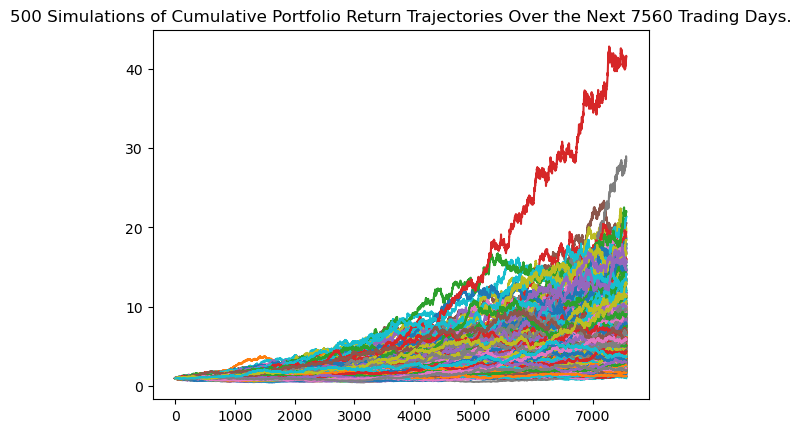

In [19]:
# Plot simulation outcomes
line_plot = MC_even_dist.plot_simulation()

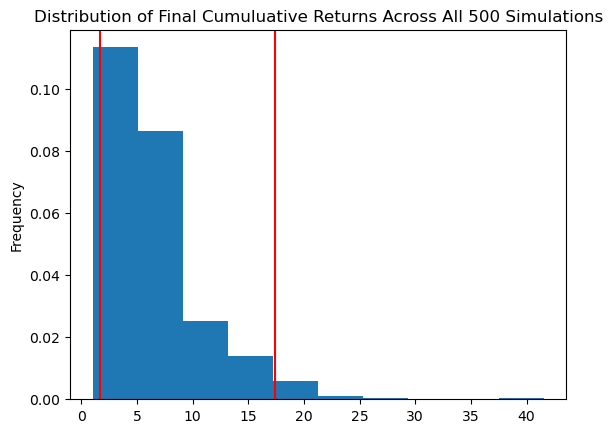

In [20]:
# Plot probability distribution and confidence intervals
dist_plot = MC_even_dist.plot_distribution()

### Retirement Analysis

In [21]:
# Fetch summary statistics from the Monte Carlo simulation results
retirement_tbl = MC_even_dist.summarize_cumulative_return()

# Print summary statistics
print(retirement_tbl)

count           500.000000
mean              6.461728
std               4.413963
min               1.032363
25%               3.455662
50%               5.453853
75%               8.047075
max              41.536411
95% CI Lower      1.715210
95% CI Upper     17.412191
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [22]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(retirement_tbl[8]*initial_investment,2)
ci_upper = round(retirement_tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $34304.19 and $348243.81


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [23]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(retirement_tbl[8]*initial_investment,2)
ci_upper = round(retirement_tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $51456.29 and $522365.72


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [24]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_even_dist = MCSimulation(
    portfolio_data = ticker_data,
    weights = [.4,.6,],
    num_simulation = 500,
    num_trading_days = 252*5)

In [25]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_even_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\falvo\OneDrive\Desktop\_Fintech\Challenge-5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.991611,0.990865,1.003737,1.005850,0.996960,1.001130,0.995789,0.998014,0.998661,1.002352,...,1.001562,1.004256,0.997888,1.004556,0.989499,0.996457,1.005950,0.991916,1.009089,0.999067
2,0.995164,0.980721,1.001030,1.014465,0.994993,1.002057,0.989131,0.995575,0.986792,1.000542,...,1.005101,1.014812,1.002834,0.988573,0.988244,0.991541,1.004973,1.009947,1.013604,0.998118
3,1.001320,0.991139,1.006446,1.007581,0.996069,1.001743,0.996074,0.993135,0.993701,1.006494,...,1.012751,1.028155,0.999993,0.994328,0.978895,0.992744,1.001073,1.010590,1.013764,1.008703
4,1.012218,0.987013,1.000226,1.015243,0.991741,1.008391,1.002853,0.999185,0.996804,1.013673,...,1.018327,1.028742,1.007576,0.992418,0.993917,0.994169,0.993361,1.017668,1.021049,1.011282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.248862,1.139148,2.351345,1.391361,1.202716,1.518525,1.165162,0.771200,2.054725,1.386723,...,1.194153,1.582625,1.227791,1.748789,1.437524,0.910986,1.210521,1.513287,1.069630,1.113093
1257,1.232245,1.158091,2.332442,1.400221,1.204279,1.526929,1.168993,0.776130,2.046395,1.397341,...,1.194607,1.571356,1.231030,1.733601,1.444825,0.896722,1.223134,1.501480,1.059572,1.112621
1258,1.237322,1.172503,2.347027,1.388858,1.205355,1.513916,1.173825,0.770866,2.054176,1.372031,...,1.194838,1.567048,1.237836,1.741935,1.440990,0.901479,1.233428,1.494997,1.063612,1.110115
1259,1.256158,1.174242,2.328633,1.378366,1.201312,1.535628,1.172315,0.759993,2.040615,1.352907,...,1.195982,1.590139,1.232665,1.735143,1.423615,0.902889,1.220980,1.492082,1.055895,1.114796


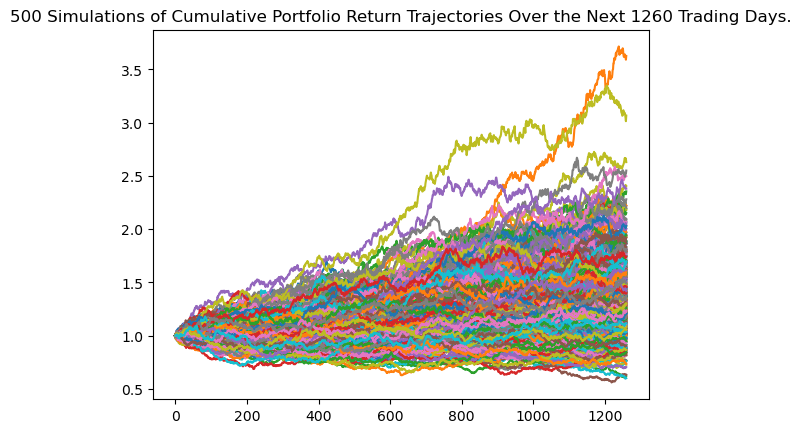

In [26]:
# Plot simulation outcomes
line_plot = MC_even_dist.plot_simulation()

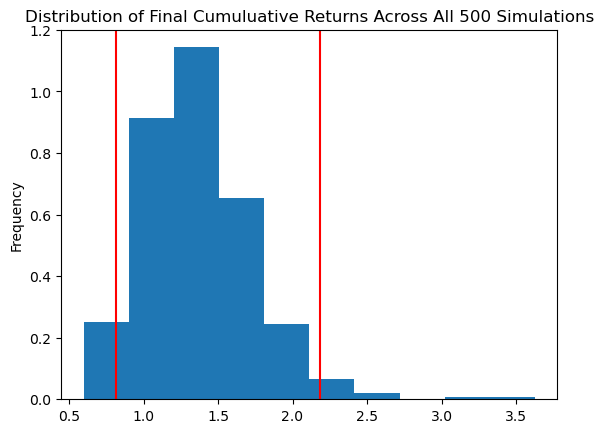

In [27]:
# Plot probability distribution and confidence intervals
dist_plot = MC_even_dist.plot_distribution()

In [28]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl_5 = MC_even_dist.summarize_cumulative_return()

# Print summary statistics
print(even_tbl_5)

count           500.000000
mean              1.369313
std               0.365010
min               0.600291
25%               1.120371
50%               1.330107
75%               1.574881
max               3.625737
95% CI Lower      0.816190
95% CI Upper      2.185547
Name: 1260, dtype: float64


In [29]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(even_tbl_5[8]*initial_investment,2)
ci_upper_five = round(even_tbl_5[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 5 years will end within in the range of $16323.81 and $43710.94


### Ten Years Retirement Option

In [30]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_even_dist = MCSimulation(
    portfolio_data = ticker_data,
    weights = [.4,.6,],
    num_simulation = 500,
    num_trading_days = 252*10)

In [31]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_even_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\falvo\OneDrive\Desktop\_Fintech\Challenge-5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.994898,0.999611,1.000170,0.987928,0.997912,0.997173,0.997803,0.996678,1.004856,1.001241,...,0.997870,1.006555,1.006707,0.987968,1.006529,0.987656,0.995703,0.998200,0.993037,1.001190
2,0.995191,1.005193,1.014150,0.995000,0.995225,0.998631,1.010644,0.995670,1.006455,1.005215,...,1.002158,0.994367,1.015632,0.991582,1.013564,0.998434,0.989802,0.997483,0.997596,1.003796
3,1.004651,1.010798,1.004397,0.989170,0.999703,0.999342,1.013813,0.987749,0.998056,1.005871,...,0.988252,1.010507,1.017048,0.990053,1.024967,0.987374,0.988963,0.987030,1.000957,0.997256
4,1.010882,1.009534,1.013431,0.994493,1.005423,1.001095,1.023385,0.987675,0.995089,0.997003,...,0.981561,1.023021,1.020918,0.992269,1.022819,0.995872,0.985936,0.982844,0.983576,1.011558
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.711416,2.293707,1.453184,3.593500,1.678192,1.855666,1.779904,1.296102,1.195494,0.748711,...,2.029913,1.690705,1.622471,3.152116,1.700906,1.159108,1.294945,1.630481,1.544679,2.226901
2517,1.724416,2.297682,1.451741,3.549021,1.672870,1.859100,1.784269,1.287449,1.208440,0.749431,...,2.014308,1.700413,1.615109,3.161523,1.721163,1.151020,1.280881,1.626301,1.522772,2.217277
2518,1.717392,2.281561,1.454076,3.550366,1.684103,1.867429,1.767922,1.300201,1.202247,0.756512,...,2.000810,1.694896,1.618238,3.175533,1.719900,1.155810,1.263173,1.634521,1.519225,2.196285
2519,1.711970,2.284747,1.457100,3.551797,1.671712,1.873644,1.769900,1.308091,1.190242,0.753115,...,2.004639,1.701620,1.609919,3.178645,1.728519,1.152830,1.261195,1.646695,1.531679,2.186068


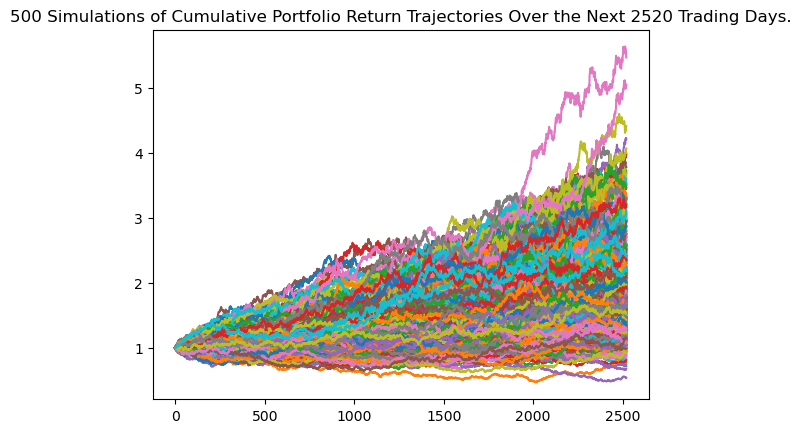

In [32]:
# Plot simulation outcomes
line_plot = MC_even_dist.plot_simulation()

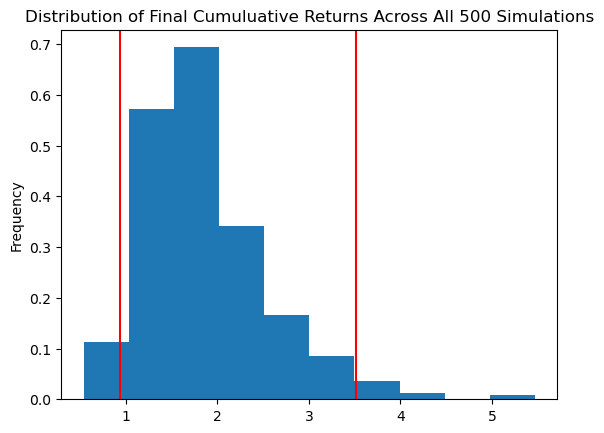

In [33]:
# Plot probability distribution and confidence intervals
dist_plot = MC_even_dist.plot_distribution()

In [34]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl_10 = MC_even_dist.summarize_cumulative_return()

# Print summary statistics
print(even_tbl_10)

count           500.000000
mean              1.855255
std               0.687873
min               0.539917
25%               1.358694
50%               1.715667
75%               2.157903
max               5.469581
95% CI Lower      0.930383
95% CI Upper      3.510708
Name: 2520, dtype: float64


In [35]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(even_tbl_5[8]*initial_investment,2)
ci_upper_ten = round(even_tbl_5[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 10 years will end within in the range of $16323.81 and $43710.94
